In [2]:
import numpy as np 
import numpy.ma as ma
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../scripts') 
from proj1_helpers import * 
TRAIN = '../data/train.csv'
NANVAL = -998

# Removing NaNs and outliers
All NaNs are in DER features or in PRI-leading features.
I removed all DER features and also PRI-leading features (although not all of DER features them contain null values)


In [3]:
y, x, _ = load_csv_data(TRAIN)
x = np.where(x < NANVAL, np.NaN, x)

x.shape

(250000, 30)

In [4]:
y

array([ 1., -1., -1., ...,  1., -1., -1.])

Normalize the data

In [5]:
mean = np.nanmean(x, axis = 0)
std = np.nanstd(x, axis = 0)
normalized = (x - mean) / std
normalized

array([[ 0.28991353,  0.06833197,  0.40768027, ...,  0.61614788,
        -1.36131161,  0.4125105 ],
       [ 0.68202131,  0.55250482,  0.54013641, ...,         nan,
                nan, -0.27381996],
       [        nan,  3.19515553,  1.09655998, ...,         nan,
                nan, -0.29396985],
       ...,
       [-0.28624947,  0.31931645, -0.13086367, ...,         nan,
                nan, -0.31701723],
       [-0.46960659, -0.84532397, -0.30297338, ...,         nan,
                nan, -0.74543941],
       [        nan,  0.66533608, -0.25352276, ...,         nan,
                nan, -0.74543941]])

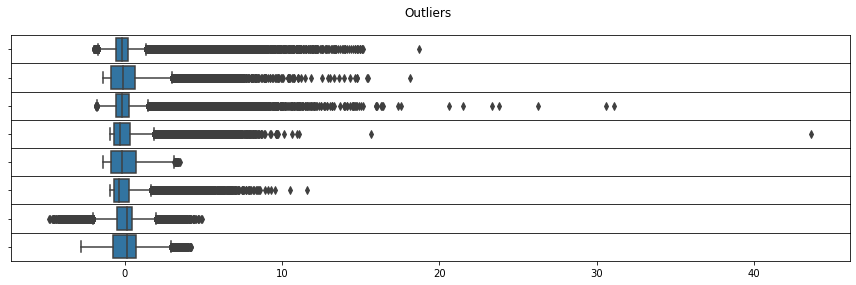

In [6]:
# A few example of outliers  
outliers = np.array([3, 8, 14, 17,19, 20, 22, 29])


fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(len(outliers), hspace=0)
axs = gs.subplots(sharex=True,sharey=True)
fig.suptitle('Outliers')

for i in range(len(outliers)):
    sns.boxplot(x=normalized[:,i], ax=axs[i])
plt.tight_layout()

Some columns contain a lot of outliers. Maybe they give some important information to predict our class so we decided not to remove them.

# Correlations

In [7]:
coeff = ma.corrcoef(ma.masked_invalid(y), ma.masked_invalid(normalized.T))

<AxesSubplot:>

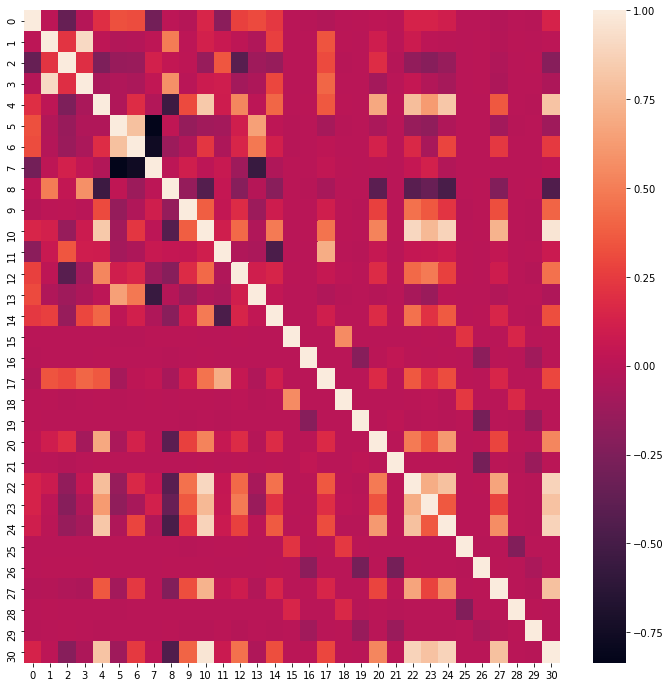

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(coeff)

We want to see the variables which are the most correlated to y and the quantity of NaNs they have.

In [9]:
np.argsort(np.abs(coeff[0][1:]))[::-1]

array([ 1,  4,  5, 12,  6, 11, 13, 10,  3,  9, 21, 29, 22, 23, 16, 26, 19,
        8,  2,  7,  0, 20, 28, 15, 18, 17, 27, 14, 24, 25], dtype=int64)

In [10]:
res = []
tmp = np.where(x < NANVAL, np.NAN, x)
tmp
for i in range(x.shape[1]):
    res.append(np.isnan(x[:, i]).sum()/x.shape[0])
print(np.sort(res)[::-1])
np.argsort(res)[::-1]

[0.709828 0.709828 0.709828 0.709828 0.709828 0.709828 0.709828 0.399652
 0.399652 0.399652 0.152456 0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.      ]


array([12,  4, 27, 26, 28,  6,  5, 25, 24, 23,  0, 10,  2,  7,  8,  1,  9,
        3, 29, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 14], dtype=int64)

Some columns have a lot of NaNs and are very correlated to y. We need to consider the presence of NaN as a feature.

# Distribution of the classes

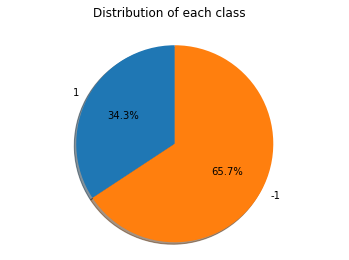

In [14]:
prob = y[y==1].sum()/y.shape[0] * 100
sizes = [prob, 100-prob]
labels= ["1", "-1"]


fig1, ax1 = plt.subplots()
fig1.suptitle("Distribution of each class")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Our classes are not balanced. We could always predict -1 and have a 0.657 accuracy.